# 05. IP Analysis

In [25]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,4) # 기본 크기를 (16,4)로 한다. (단위는 인치)

df = pd.read_pickle('data/web_20140408.pkl')
df.head()

,ip,tz,method,res,protocol,status,len
time,,,,,,,
2014-04-08 00:00:33,192.5.90.39,900,GET,/,HTTP/1.1,200,1964
2014-04-08 00:00:44,211.36.150.107,900,GET,/trapi/mts/Check.jsp,HTTP/1.1,200,3419
2014-04-08 00:00:53,211.36.145.162,900,GET,/trapi/mts/Check.jsp,HTTP/1.1,200,3419
2014-04-08 00:01:12,118.34.149.235,900,GET,/common/popup/popup_hts_notice1.html,HTTP/1.1,200,2097
2014-04-08 00:01:13,118.34.149.235,900,GET,/img/popup/popup_140403_sms.jpg,HTTP/1.1,200,32709


## groupby()
* IP주소를 기준으로 그룹핑하고, size()산정
* 결과, IP별 요청수

In [27]:
ips = df.groupby('ip').size()
ips

ip
1.11.20.10         2
1.11.225.206      15
1.11.227.76        2
1.11.78.188       46
1.11.81.110       13
1.11.90.2          3
1.122.200.112      1
1.176.115.189      1
1.176.123.95       2
1.176.75.161       2
1.177.124.219      6
1.177.145.246    256
1.177.162.227    101
1.177.189.218      2
1.177.228.83       1
...
82.35.247.15        5
83.136.13.5         2
85.113.58.144       1
86.64.140.84        2
87.200.43.106      21
88.139.11.22        1
88.176.196.18       1
88.189.153.215      1
90.13.127.100       1
90.218.202.148      1
90.34.240.48        1
92.148.152.63       2
93.184.238.133     49
94.125.95.9         1
99.189.0.21       300
Length: 7515, dtype: int64

## 기본통계량
표본수(count), 평균(mean), 표준편차(std), 4분위값(25%, 50%, 75%), 최대값(max)

In [28]:
ips.describe()

count     7515.000000
mean        48.505256
std        274.811374
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max      14457.000000
dtype: float64

## TOP-N
오름차순(ascending)소트 한 후, 뒷 부분 n개를 추출 

In [34]:
ips.sort()
ips[-20:]

ip
121.153.165.149     2008
175.197.168.218     2063
124.80.85.234       2067
175.200.183.182     2152
180.69.216.87       2272
124.53.161.58       2434
210.106.60.36       2693
175.203.104.229     2804
61.100.197.190      3000
125.138.98.12       3003
112.169.234.11      3014
115.88.199.168      3076
115.140.107.121     3114
210.124.124.37      3178
59.9.60.43          3516
119.192.182.9       3550
112.167.50.181      5257
222.122.27.237      5273
1.232.86.214        7278
210.124.124.22     14457
dtype: int64

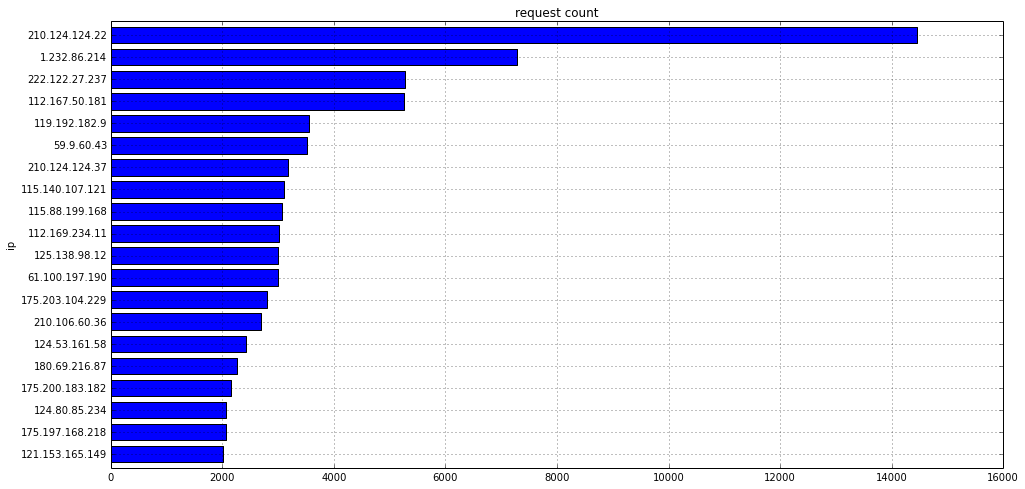

In [38]:
ips[-20:].plot(kind='barh', figsize=(16,8), title="request count")

## Boolean indexing
특정 IP의 요청 내역

In [63]:
t = df[df.ip == '210.124.124.22']
t.head()

,ip,tz,method,res,protocol,status,len
time,,,,,,,
2014-04-08 07:51:18,210.124.124.22,900,GET,/api/kbstar/nowPrice.action?shcode=122630,HTTP/1.1,200,6120
2014-04-08 07:51:18,210.124.124.22,900,GET,/common/empty.jsp,HTTP/1.1,200,68
2014-04-08 07:51:18,210.124.124.22,900,GET,/common/empty.jsp,HTTP/1.1,200,68
2014-04-08 07:51:18,210.124.124.22,900,GET,/common/empty.jsp,HTTP/1.1,200,68
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/hiddenUpname.action,HTTP/1.1,200,713


In [62]:
t = df[(df.ip == '210.124.124.22') & (df.method == 'POST') ]
t.head()

,ip,tz,method,res,protocol,status,len
time,,,,,,,
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/hiddenUpname.action,HTTP/1.1,200,713
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/StockHoga.action?hasTab=N&hasButto...,HTTP/1.1,200,15645
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/StockHoga.action?hasTab=N&hasButto...,HTTP/1.1,200,15645
2014-04-08 08:07:58,210.124.124.22,900,POST,/api/kbstar/hiddenUpname.action,HTTP/1.1,200,724
2014-04-08 08:07:58,210.124.124.22,900,POST,/api/kbstar/StockHoga.action?hasTab=N&hasButto...,HTTP/1.1,200,15654


특정 IP의 하루동안 요청 활동

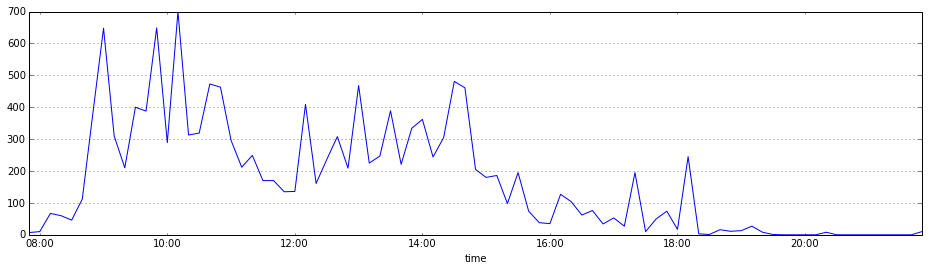

In [59]:
df_t = df[df.ip == '210.124.124.22']['len'].resample('10T', how='count')
df_t.plot()

In [ ]:
# reverse lookup
import socket
socket.gethostbyaddr('210.124.124.22') 

In [ ]:
# reverse lookup

'''
iip = ips[-20:]

for i in iip.index:
    try:
        print i
        socket.gethostbyaddr(i)
    except:
        pass
'''

## Geo IP
pygeoip 모듈

In [69]:
import pygeoip
gi = pygeoip.GeoIP('geo/GeoLiteCity.dat', pygeoip.MEMORY_CACHE)

In [71]:
ipcon = gi.record_by_addr('210.124.124.22')
ipcon 

{'area_code': 0,
 'city': None,
 'continent': 'AS',
 'country_code': 'KR',
 'country_code3': 'KOR',
 'country_name': 'Korea, Republic of',
 'dma_code': 0,
 'latitude': 37.56999999999999,
 'longitude': 126.98000000000002,
 'metro_code': None,
 'postal_code': None,
 'region_code': None,
 'time_zone': 'Asia/Seoul'}

## Geo IP and Google Map

In [73]:
print 'https://google.com/maps/search/%f+%f' % ( ipcon['latitude'], ipcon['longitude'] )

https://google.com/maps/search/37.570000+126.980000


In [78]:
from IPython.display import HTML
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m14!1m8!1m3!1d12649.463731967224!2d126.97999999999999!3d37.57000000000001!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x0%3A0x0!2zMzfCsDM0JzEyLjAiTiAxMjbCsDU4JzQ4LjAiRQ!5e0!3m2!1sko!2s!4v1397513348601" width="600" height="450" frameborder="0" style="border:0"></iframe>')

In [87]:
ips

ip
117.111.15.240     1
39.7.57.114        1
119.148.135.187    1
175.223.12.77      1
39.7.45.192        1
39.7.56.227        1
118.41.33.143      1
39.7.56.224        1
183.91.221.32      1
183.91.195.63      1
183.30.205.187     1
183.91.251.86      1
118.42.127.234     1
118.42.54.158      1
118.37.70.3        1
...
124.53.161.58       2434
210.106.60.36       2693
175.203.104.229     2804
61.100.197.190      3000
125.138.98.12       3003
112.169.234.11      3014
115.88.199.168      3076
115.140.107.121     3114
210.124.124.37      3178
59.9.60.43          3516
119.192.182.9       3550
112.167.50.181      5257
222.122.27.237      5273
1.232.86.214        7278
210.124.124.22     14457
Length: 7515, dtype: int64

## Geo IP 정보로 DataFrame 생성

In [110]:
cols = ['city', 'continent', 'country_name', 'country_code3', 'latitude', 'longitude']

ip_infos = []
for i in ips.index:
    ipcon = gi.record_by_addr(i)
    if not ipcon:
        print 'The IP(%s) not found in geo IP DB' % i
        continue
    r = ipcon
    r['ip'] = i # IP Address
    r['count'] = ips[i] # request count
    r['gmap'] = 'https://www.google.com/maps/search/%.5f+%.5f' % ( r['latitude'], r['longitude'] )
    ip_infos.append( r )

The IP(162.244.107.41) not found in geo IP DB


In [119]:
df_loc = DataFrame(ip_infos)
df_loc.index = df_loc.pop('ip')
df_loc.head()

,area_code,city,continent,count,country_code,country_code3,country_name,dma_code,gmap,latitude,longitude,metro_code,postal_code,region_code,time_zone
ip,,,,,,,,,,,,,,,
117.111.15.240,0,Yongsan,AS,1,KR,KOR,"Korea, Republic of",0,https://www.google.com/maps/search/37.53330+12...,37.5333,126.9667,None,None,11,Asia/Seoul
39.7.57.114,0,Seoul,AS,1,KR,KOR,"Korea, Republic of",0,https://www.google.com/maps/search/37.59850+12...,37.5985,126.9783,None,None,11,Asia/Seoul
119.148.135.187,0,None,AS,1,KR,KOR,"Korea, Republic of",0,https://www.google.com/maps/search/37.57000+12...,37.5700,126.9800,None,None,None,Asia/Seoul
175.223.12.77,0,None,AS,1,KR,KOR,"Korea, Republic of",0,https://www.google.com/maps/search/37.57000+12...,37.5700,126.9800,None,None,None,Asia/Seoul
39.7.45.192,0,Seoul,AS,1,KR,KOR,"Korea, Republic of",0,https://www.google.com/maps/search/37.59850+12...,37.5985,126.9783,None,None,11,Asia/Seoul


## Foreign IP

In [121]:
df_foreign = df_loc[df_loc['country_code3'] != 'KOR']  
df_foreign.head(10)

,area_code,city,continent,count,country_code,country_code3,country_name,dma_code,gmap,latitude,longitude,metro_code,postal_code,region_code,time_zone
ip,,,,,,,,,,,,,,,
183.30.205.187,0,Guangzhou,AS,1,CN,CHN,China,0,https://www.google.com/maps/search/23.11670+11...,23.1167,113.2500,None,None,30,Asia/Chongqing
118.201.191.10,0,None,AS,1,SG,SGP,Singapore,0,https://www.google.com/maps/search/1.36670+103...,1.3667,103.8000,None,None,None,Asia/Singapore
182.250.243.202,0,None,AS,1,JP,JPN,Japan,0,https://www.google.com/maps/search/35.69000+13...,35.6900,139.6900,None,None,None,Asia/Tokyo
190.181.23.247,0,La Paz,SA,1,BO,BOL,Bolivia,0,https://www.google.com/maps/search/-16.50000+-...,-16.5000,-68.1500,None,None,04,America/La_Paz
203.174.239.39,0,Tokyo,AS,1,JP,JPN,Japan,0,https://www.google.com/maps/search/35.68500+13...,35.6850,139.7514,None,None,40,Asia/Tokyo
203.144.90.94,0,Phnom Penh,AS,1,KH,KHM,Cambodia,0,https://www.google.com/maps/search/11.55000+10...,11.5500,104.9167,None,None,11,Asia/Phnom_Penh
203.144.90.79,0,Phnom Penh,AS,1,KH,KHM,Cambodia,0,https://www.google.com/maps/search/11.55000+10...,11.5500,104.9167,None,None,11,Asia/Phnom_Penh
2.9.173.108,0,Château-gontier,EU,1,FR,FRA,France,0,https://www.google.com/maps/search/47.82770+-0...,47.8277,-0.7003,None,53200,B5,Europe/Paris
203.144.90.70,0,Phnom Penh,AS,1,KH,KHM,Cambodia,0,https://www.google.com/maps/search/11.55000+10...,11.5500,104.9167,None,None,11,Asia/Phnom_Penh


## Foreign IP, TOP-N

In [122]:
df_foreign_sort = df_foreign.sort('count')
df_foreign_sort[-10:]

,area_code,city,continent,count,country_code,country_code3,country_name,dma_code,gmap,latitude,longitude,metro_code,postal_code,region_code,time_zone
ip,,,,,,,,,,,,,,,
107.178.45.49,408,Saratoga,NA,199,US,USA,United States,807,https://www.google.com/maps/search/37.25390+-1...,37.2539,-122.0638,"San Francisco, CA",95070,CA,America/Los_Angeles
121.79.144.176,0,Chaoyang,AS,223,CN,CHN,China,0,https://www.google.com/maps/search/41.57030+12...,41.5703,120.4586,None,None,19,Asia/Harbin
99.189.0.21,818,Glendale,NA,300,US,USA,United States,803,https://www.google.com/maps/search/34.16930+-1...,34.1693,-118.2663,"Los Angeles, CA",91202,CA,America/Los_Angeles
123.223.85.58,0,Tokyo,AS,309,JP,JPN,Japan,0,https://www.google.com/maps/search/35.68500+13...,35.6850,139.7514,None,None,40,Asia/Tokyo
65.24.104.75,614,Dublin,NA,317,US,USA,United States,535,https://www.google.com/maps/search/40.09890+-8...,40.0989,-83.1615,"Columbus, OH",43016,OH,America/New_York
155.126.8.18,0,None,AS,329,AP,AP,Asia/Pacific Region,0,https://www.google.com/maps/search/35.00000+10...,35.0000,105.0000,None,None,None,None
75.157.46.118,0,North Vancouver,NA,343,CA,CAN,Canada,0,https://www.google.com/maps/search/49.31670+-1...,49.3167,-123.0667,None,None,BC,America/Vancouver
122.54.250.2,0,None,AS,396,PH,PHL,Philippines,0,https://www.google.com/maps/search/13.00000+12...,13.0000,122.0000,None,None,None,Asia/Manila
142.136.3.65,714,Fullerton,NA,553,US,USA,United States,803,https://www.google.com/maps/search/33.90190+-1...,33.9019,-117.9108,"Los Angeles, CA",92835,CA,America/Los_Angeles


In [128]:
print df_foreign_sort[-1:]['gmap'].values

['https://www.google.com/maps/search/51.00000+9.00000']


## groupby country 

In [131]:
g_country = df_loc.groupby('country_code3')

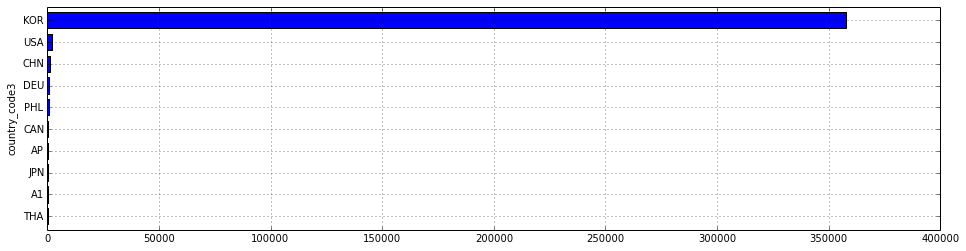

In [133]:
f = g_country.agg('sum').copy()
f_sort = f.sort('count')
f_sort['count'][-10:].plot(kind='barh')

## groupby (method, ip) 

In [160]:
ipm = df.groupby(['method', 'ip']).size()
ipm

method  ip           
GET     1.11.20.10         2
        1.11.225.206      15
        1.11.227.76        2
        1.11.78.188       46
        1.11.81.110       13
        1.11.90.2          3
        1.122.200.112      1
        1.176.115.189      1
        1.176.123.95       2
        1.176.75.161       2
        1.177.124.219      6
        1.177.145.246    251
        1.177.162.227     84
        1.177.189.218      2
        1.177.228.83       1
...
POST    61.74.39.242      7
        61.76.63.41       4
        61.78.108.32     54
        61.78.36.194      5
        61.78.36.197     10
        61.79.59.121     10
        61.82.194.121    54
        61.84.39.56      22
        61.84.42.170      5
        61.97.215.184     3
        61.98.76.87      61
        65.24.104.75     12
        65.49.14.168     19
        75.157.46.118    13
        99.189.0.21      75
Length: 8269, dtype: int64

## POST 요청  TOP-n IPs

In [158]:
ipm_post = ipm['POST'].copy()
ipm_post.sort()
ipm_post[-10:]

ip
119.75.94.77        585
175.203.104.229     614
112.167.50.181      647
61.100.197.190      652
115.140.107.121     708
112.169.234.11      877
180.69.216.87       913
175.200.183.182    1122
1.232.86.214       1810
210.124.124.22     5703
dtype: int64

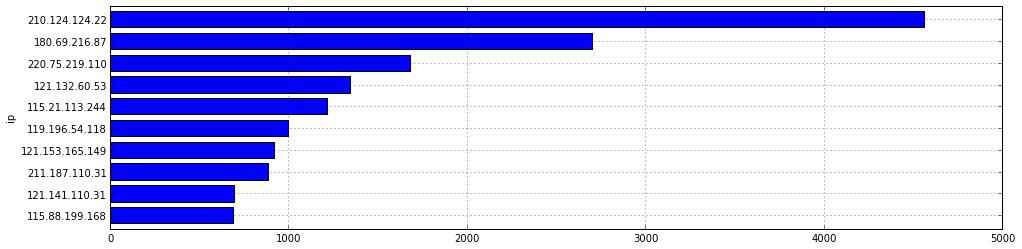

In [46]:
ipm_post[-10:].plot(kind='barh')

## 특정 IP의 일일 요청

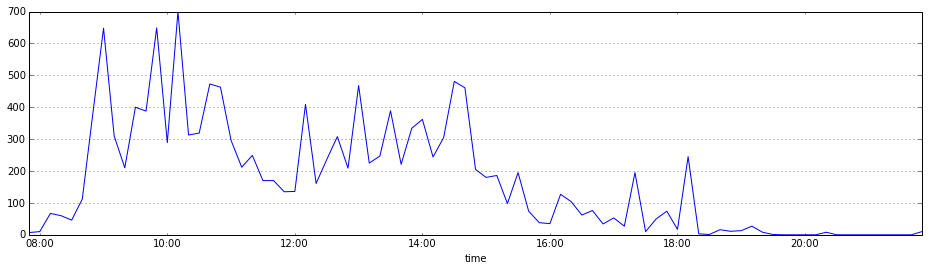

In [175]:
df_t = df[df['ip'] == '210.124.124.22']['method'].resample('10T', how='count')
df_t.plot()

In [163]:
df[df['ip'] == '210.124.124.22'][0:20]

,ip,tz,method,res,protocol,status,len
time,,,,,,,
2014-04-08 07:51:18,210.124.124.22,900,GET,/api/kbstar/nowPrice.action?shcode=122630,HTTP/1.1,200,6120
2014-04-08 07:51:18,210.124.124.22,900,GET,/common/empty.jsp,HTTP/1.1,200,68
2014-04-08 07:51:18,210.124.124.22,900,GET,/common/empty.jsp,HTTP/1.1,200,68
2014-04-08 07:51:18,210.124.124.22,900,GET,/common/empty.jsp,HTTP/1.1,200,68
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/hiddenUpname.action,HTTP/1.1,200,713
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/StockHoga.action?hasTab=N&hasButto...,HTTP/1.1,200,15645
2014-04-08 07:51:18,210.124.124.22,900,POST,/api/kbstar/StockHoga.action?hasTab=N&hasButto...,HTTP/1.1,200,15645
2014-04-08 08:07:58,210.124.124.22,900,GET,/js/stock/OTBCODE.js,HTTP/1.1,200,2654
2014-04-08 08:07:58,210.124.124.22,900,POST,/api/kbstar/hiddenUpname.action,HTTP/1.1,200,724
